<h1>Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent</h1>

In [33]:
import pandas as pd
import random
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load the dataset in pandas dataframe
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.shape

(20, 3)

In [4]:
df.dtypes

,0
area,int64
bedrooms,int64
price,float64


<b>1- Batch Gradient Descent : </b>

- Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties.

Scalling the columns :

In [7]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [8]:
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [11]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [12]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
scaled_y.shape

(20, 1)

Convert Target (Price) into one dimentional array. It has become 2D due to scaling that we did above but now we should change to 1D.

In [14]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [15]:
scaled_X.shape

(20, 2)

Gradient descent allows us to find the wieghts (w1, w2) and bias in following linear equation for housing price prediction.

<b>          ==> price = w1 * area + w2 * bedrooms + bias </b>

In [25]:
import numpy as np

def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))  # Initialize weights to 1
    b = 0  # Initialize bias to 0
    total_samples = X.shape[0]  # Number of rows in X

    cost_list = []  # To store the cost for each epoch
    epoch_list = []  # To store the epoch numbers

    for i in range(epochs):
        # Predicted values based on current weights and bias
        y_predicted = np.dot(w, X.T) + b

        # Compute the gradient of the cost function with respect to the weights (w)
        # (X.T.dot(y_true - y_predicted)) calculates the sum of the errors multiplied by the input features,
        # effectively giving the direction and magnitude to adjust each weight.
        # The term -(2/total_samples) scales the gradient by the number of samples and includes the negative
        # sign and factor 2 from the derivative of the Mean Squared Error (MSE) function.
        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

        # Update the weights and bias using the computed gradients
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Compute the Mean Squared Error (MSE) cost function
        cost = np.mean(np.square(y_true - y_predicted))

        # Every 10 epochs, store the cost and epoch number for tracking progress
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    # Return the final weights, bias, last computed cost, and lists of costs and epochs
    return w, b, cost, cost_list, epoch_list

In [26]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Plot epoch vs cost

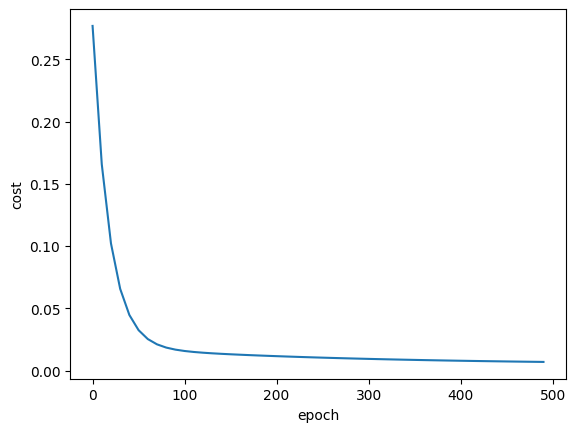

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [28]:
def predict(area, bedrooms, w, b) :
  scaled_X = sx.transform([[area, bedrooms]])[0]
  # scaled_X[0] is area
  # scaled_X[1] is bedrooms
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  # once we get price prediction we need to to rescal it back to original value
  # also since it returns 2D array, to get single value we need to do value[0][0]
  return sy.inverse_transform([[scaled_price]])[0][0]


In [29]:
predict(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [31]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [32]:
predict(1500, 3, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

<b>2- Stochastique Gradient Descent : </b>

- In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights.

- So the key difference here is that to adjust weights batch GD will use all training samples(features) where as stochastic GD will use one randomly picked training sample

In [42]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [43]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70695942, 0.67463996]), -0.22929499364299363, 0.002191247961592644)

In [44]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

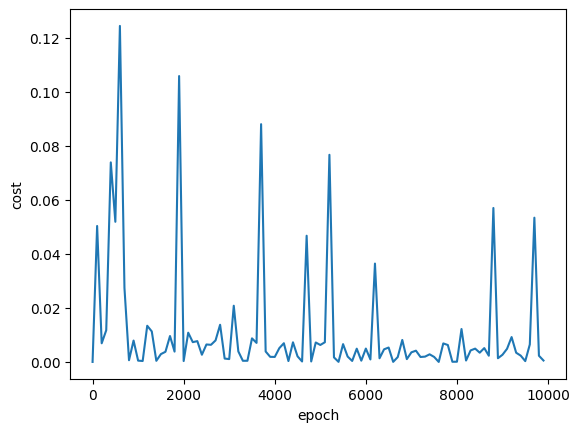

In [45]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.59079535009104

In [47]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.62049896673716

In [48]:
predict(1000,2,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.396310446649863